In [3]:
#imprting all the required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import seaborn as sns
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet 

In [4]:
# Get the "AAPL" stock data
ticker = yf.Ticker("AAPL")
end=datetime.now()
start = datetime(end.year-7,end.month,end.day)
# Get the OHLC data for the past 7 years in 1 day intervals
ohlc = ticker.history(period="1d", interval="1D", start=start, end=end)
aapl = pd.DataFrame(ohlc)

In [5]:
aapl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-03-22 00:00:00-04:00,24.182401,24.651115,24.173211,24.520151,129777600,0.0,0.0
2016-03-23 00:00:00-04:00,24.465006,24.600565,24.331744,24.384588,102814000,0.0,0.0
2016-03-24 00:00:00-04:00,24.232950,24.412164,24.099688,24.278902,104532000,0.0,0.0
2016-03-28 00:00:00-04:00,24.354720,24.398375,24.138743,24.168613,77645600,0.0,0.0
2016-03-29 00:00:00-04:00,24.099686,24.765995,24.097388,24.740721,124760400,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-15 00:00:00-04:00,151.190002,153.250000,149.919998,152.990005,77167900,0.0,0.0
2023-03-16 00:00:00-04:00,152.160004,156.460007,151.639999,155.850006,76161100,0.0,0.0
2023-03-17 00:00:00-04:00,156.080002,156.740005,154.279999,155.000000,98862500,0.0,0.0


In [6]:
#reseting the index of the dataframe
aapl = aapl.reset_index()

In [7]:
#changing the data type of date colume to match Propher model requirements
aapl['Date'] = aapl['Date'].dt.tz_localize(None)

In [8]:
#checking the data types for all columns
aapl.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [10]:
split_date = 1589
aapl_train = aapl.loc[aapl.index <= split_date].copy()
aapl_test = aapl.loc[aapl.index > split_date].copy()



In [11]:
aapl_train_prophet = aapl_train.reset_index().rename(columns={'Date':'ds','Close':'y'})

In [12]:
aapl = aapl.reset_index().rename(columns={'Date':'ds','Close':'y'})

In [13]:
aapl_train

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2016-03-22,24.182401,24.651115,24.173211,24.520151,129777600,0.0,0.0
1,2016-03-23,24.465006,24.600565,24.331744,24.384588,102814000,0.0,0.0
2,2016-03-24,24.232950,24.412164,24.099688,24.278902,104532000,0.0,0.0
3,2016-03-28,24.354720,24.398375,24.138743,24.168613,77645600,0.0,0.0
4,2016-03-29,24.099686,24.765995,24.097388,24.740721,124760400,0.0,0.0
...,...,...,...,...,...,...,...,...
1585,2022-07-08,144.597489,146.877053,144.338680,146.369370,64547800,0.0,0.0
1586,2022-07-11,145.005613,145.971191,143.124234,144.209259,63141600,0.0,0.0
1587,2022-07-12,145.095213,147.772947,144.388460,145.194763,77588800,0.0,0.0
1588,2022-07-13,142.337849,145.782060,141.471806,144.826447,71185600,0.0,0.0


In [14]:
aapl_test

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1590,2022-07-15,149.096872,150.171948,147.524076,149.485092,76259900,0.0,0.0
1591,2022-07-18,150.052506,150.878722,146.030923,146.399246,81420900,0.0,0.0
1592,2022-07-19,147.245370,150.540272,146.239982,150.311325,82982400,0.0,0.0
1593,2022-07-20,150.430769,153.018917,149.684190,152.342010,64823400,0.0,0.0
1594,2022-07-21,153.795350,154.860477,151.247028,154.641479,65086600,0.0,0.0
...,...,...,...,...,...,...,...,...
1757,2023-03-15,151.190002,153.250000,149.919998,152.990005,77167900,0.0,0.0
1758,2023-03-16,152.160004,156.460007,151.639999,155.850006,76161100,0.0,0.0
1759,2023-03-17,156.080002,156.740005,154.279999,155.000000,98862500,0.0,0.0
1760,2023-03-20,155.070007,157.820007,154.149994,157.399994,73641400,0.0,0.0


In [15]:
model = Prophet()
model.fit(aapl)

02:40:20 - cmdstanpy - INFO - Chain [1] start processing
02:40:20 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
aapl_test_prophet = aapl_test.reset_index().rename(columns={'Date':'ds','Close':'y'})
aapl_test_fcst = model.predict(aapl_test_prophet)

In [17]:
aapl_test_fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-15,152.186107,142.491189,157.621741,152.186107,152.186107,-2.041512,-2.041512,-2.041512,-0.532106,-0.532106,-0.532106,-1.509406,-1.509406,-1.509406,0.0,0.0,0.0,150.144595
1,2022-07-18,152.091664,143.204262,158.493551,152.091664,152.091664,-1.460758,-1.460758,-1.460758,-0.251075,-0.251075,-0.251075,-1.209683,-1.209683,-1.209683,0.0,0.0,0.0,150.630906
2,2022-07-19,152.060182,142.687724,158.261363,152.060182,152.060182,-1.385589,-1.385589,-1.385589,-0.276069,-0.276069,-0.276069,-1.109520,-1.109520,-1.109520,0.0,0.0,0.0,150.674593
3,2022-07-20,152.028701,142.695641,158.344013,152.028701,152.028701,-1.304733,-1.304733,-1.304733,-0.298273,-0.298273,-0.298273,-1.006460,-1.006460,-1.006460,0.0,0.0,0.0,150.723968
4,2022-07-21,151.997220,142.447542,158.422267,151.997220,151.997220,-1.328982,-1.328982,-1.328982,-0.430164,-0.430164,-0.430164,-0.898818,-0.898818,-0.898818,0.0,0.0,0.0,150.668238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,2023-03-15,144.536196,136.094568,152.910626,144.536196,144.536196,-0.498069,-0.498069,-0.498069,-0.298273,-0.298273,-0.298273,-0.199796,-0.199796,-0.199796,0.0,0.0,0.0,144.038127
168,2023-03-16,144.504715,136.098673,151.319394,144.504715,144.504715,-0.573486,-0.573486,-0.573486,-0.430164,-0.430164,-0.430164,-0.143321,-0.143321,-0.143321,0.0,0.0,0.0,143.931229
169,2023-03-17,144.473234,135.852999,151.782297,144.473234,144.473234,-0.610052,-0.610052,-0.610052,-0.532106,-0.532106,-0.532106,-0.077946,-0.077946,-0.077946,0.0,0.0,0.0,143.863182
170,2023-03-20,144.378790,136.006977,152.331406,144.378790,144.378790,-0.101193,-0.101193,-0.101193,-0.251075,-0.251075,-0.251075,0.149882,0.149882,0.149882,0.0,0.0,0.0,144.277597


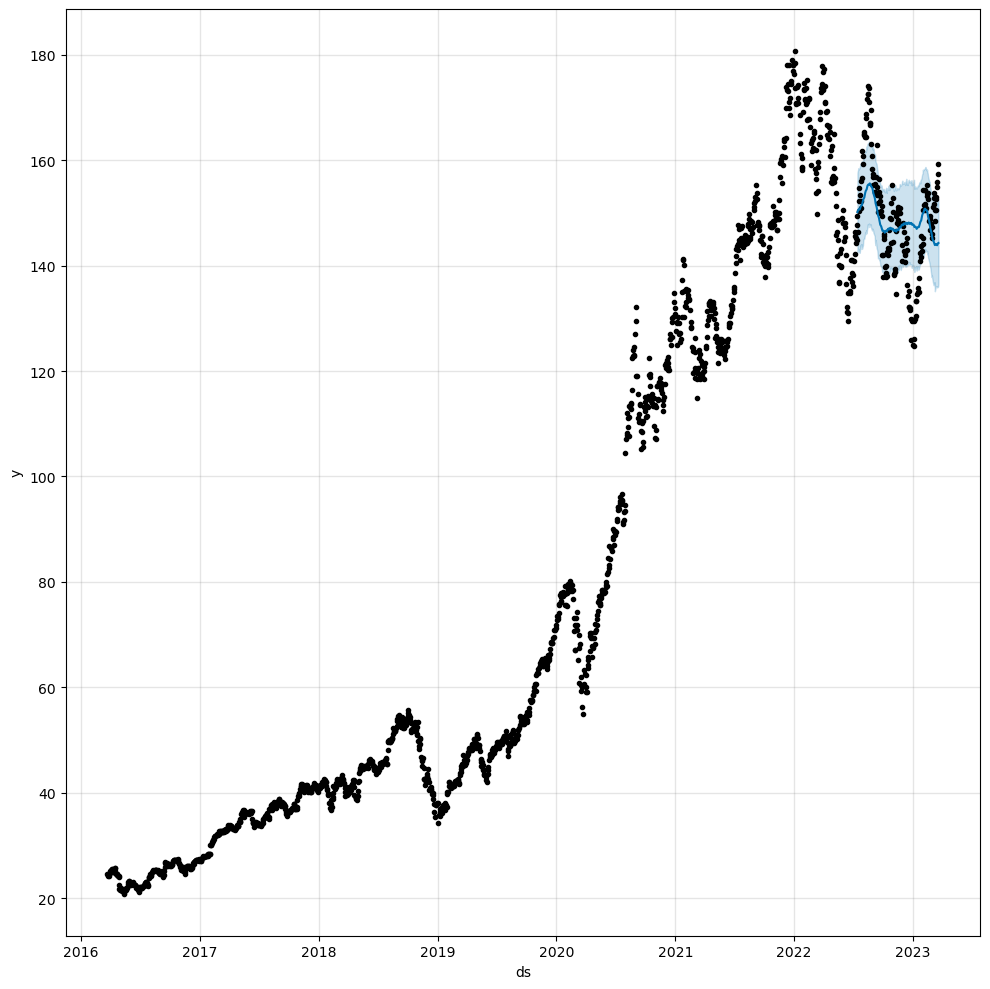

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
fig = model.plot(aapl_test_fcst , ax =ax)
plt.show()

In [19]:
plot_plotly(model,aapl_test_fcst)

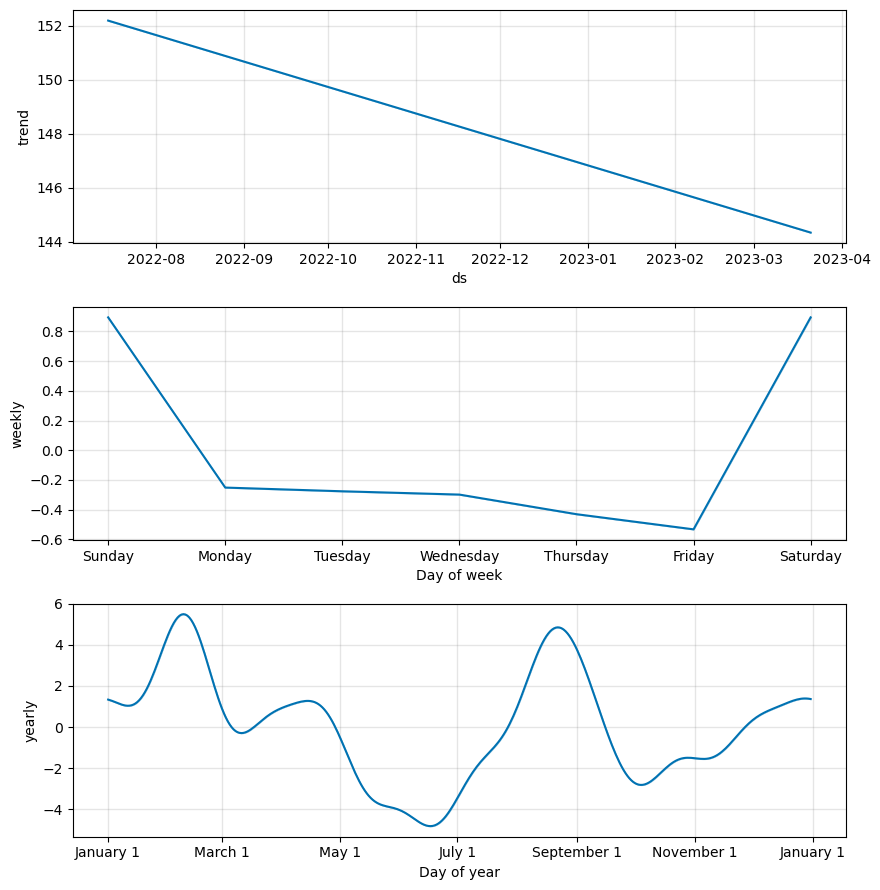

In [20]:
fig = model.plot_components(aapl_test_fcst)
plt.show()

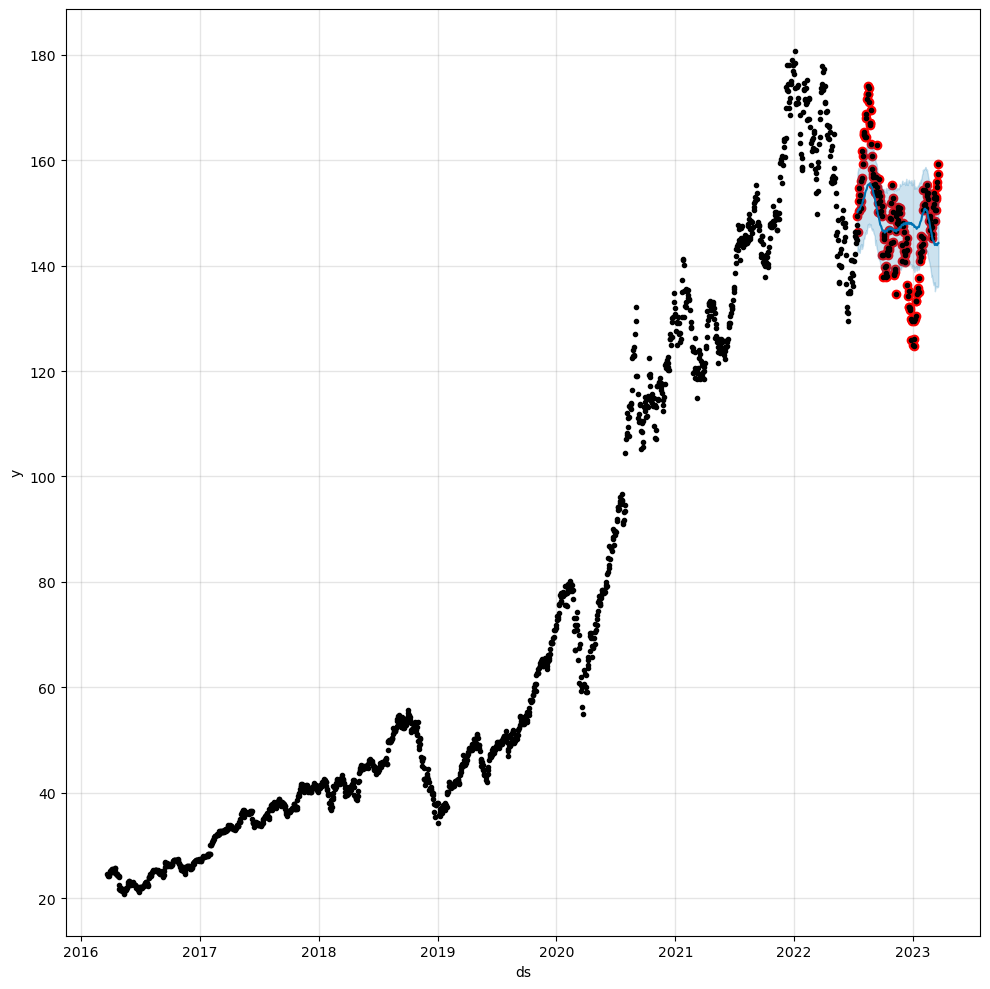

In [27]:
#Comparing actual close price to what the model predicted on train set
f ,ax = plt.subplots(figsize = (10,10))
ax.scatter(aapl_test['Date'], aapl_test['Close'],color='r')
fig = model.plot(aapl_test_fcst , ax=ax)

In [28]:
#Creating a future dataframe of 365 days
future = model.make_future_dataframe(periods =365, freq ='D',include_history=False)
forecast = model.predict(future)

In [29]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
360,2024-03-16,132.982627,109.803425,155.788103,110.961085,153.058816,0.798843,0.798843,0.798843,0.893844,0.893844,0.893844,-0.095000,-0.095000,-0.095000,0.0,0.0,0.0,133.781470
361,2024-03-17,132.951146,109.786900,154.071494,110.849239,153.100812,0.869420,0.869420,0.869420,0.893843,0.893843,0.893843,-0.024423,-0.024423,-0.024423,0.0,0.0,0.0,133.820566
362,2024-03-18,132.919665,110.175410,153.484210,110.737392,153.142808,-0.199854,-0.199854,-0.199854,-0.251075,-0.251075,-0.251075,0.051221,0.051221,0.051221,0.0,0.0,0.0,132.719811
363,2024-03-19,132.888184,108.261266,154.900172,110.625546,153.184804,-0.146131,-0.146131,-0.146131,-0.276069,-0.276069,-0.276069,0.129938,0.129938,0.129938,0.0,0.0,0.0,132.742053
364,2024-03-20,132.856703,109.100296,154.499278,110.513700,153.226801,-0.088343,-0.088343,-0.088343,-0.298273,-0.298273,-0.298273,0.209930,0.209930,0.209930,0.0,0.0,0.0,132.768359


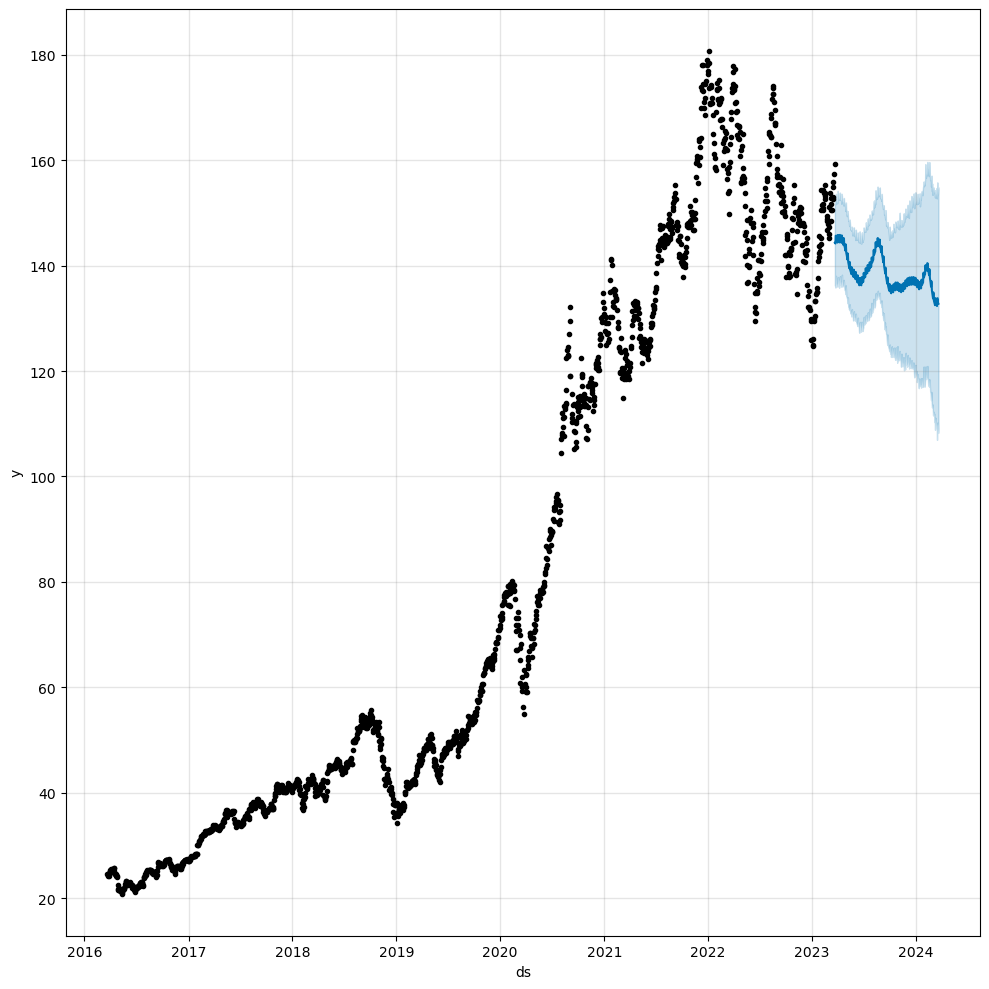

In [30]:
fi, ax = plt.subplots(figsize=(10,10))
fi = model.plot(forecast , ax =ax)
plt.show()